In [1]:
#import librerys 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
#import les 2 dataframes
df1 = pd.read_excel("C:/Users/MSI/Desktop/execice/final_dataframe ACA.xlsx")
df2 = pd.read_excel("C:/Users/MSI/Desktop/execice/final_dataframe CCA.xlsx")

In [3]:
# Fusion des data frames en utilisant la colonne 'Probe Set Name' comme clé
combined_df = pd.merge(df1, df2, on='Probe Set Name')

# Affichage de la data frame combinée
combined_df

,Probe Set Name,AC3A signal,AC4A signal,AC5A signal,AC6A signal,AC7A signal,CC1A signal,CC2A signal,CC3A signal,CC6A signal
0,AFFX-BioB-5_at,239.1,249.3,243.6,293.0,257.2,347.1,287.9,254.6,235.7
1,AFFX-BioB-M_at,438.0,405.7,513.1,498.9,467.7,552.4,477.3,320.0,355.1
2,AFFX-BioB-3_at,269.7,237.3,312.5,334.3,252.9,318.2,279.9,228.9,256.0
3,AFFX-BioC-5_at,665.1,622.3,773.4,788.9,751.3,907.4,770.1,586.7,581.9
4,AFFX-BioC-3_at,837.4,818.7,914.4,1030.9,952.2,1220.7,1025.4,793.0,788.6
...,...,...,...,...,...,...,...,...,...,...
54670,1570644_at,7.3,2.2,12.4,9.0,12.7,25.0,17.1,11.2,19.6
54671,1570645_at,0.5,9.9,10.9,11.7,15.6,26.1,3.3,0.7,7.1
54672,1570650_at,6.7,3.3,4.8,5.5,3.7,2.8,22.5,9.5,3.7
54673,1570651_at,9.7,5.3,4.5,1.9,17.5,3.4,5.4,3.2,29.7


In [4]:
# Définir "Probe Set Name" comme l'index de combined_df
combined_df = combined_df.set_index('Probe Set Name')

In [5]:
# Affichage des premières lignes de la DataFrame
print(combined_df.head())

                AC3A signal  AC4A signal  AC5A signal  AC6A signal   
Probe Set Name                                                       
AFFX-BioB-5_at        239.1        249.3        243.6        293.0  \
AFFX-BioB-M_at        438.0        405.7        513.1        498.9   
AFFX-BioB-3_at        269.7        237.3        312.5        334.3   
AFFX-BioC-5_at        665.1        622.3        773.4        788.9   
AFFX-BioC-3_at        837.4        818.7        914.4       1030.9   

                AC7A signal  CC1A signal  CC2A signal  CC3A signal   
Probe Set Name                                                       
AFFX-BioB-5_at        257.2        347.1        287.9        254.6  \
AFFX-BioB-M_at        467.7        552.4        477.3        320.0   
AFFX-BioB-3_at        252.9        318.2        279.9        228.9   
AFFX-BioC-5_at        751.3        907.4        770.1        586.7   
AFFX-BioC-3_at        952.2       1220.7       1025.4        793.0   

                CC

In [6]:
# Obtenir des statistiques descriptives de base pour chaque colonne
print(combined_df.describe())

        AC3A signal   AC4A signal   AC5A signal   AC6A signal   AC7A signal   
count  54675.000000  54675.000000  54675.000000  54675.000000  54675.000000  \
mean     192.694156    191.083237    200.969118    201.436016    199.949750   
std      866.635742    862.170662    961.345334    975.960289    953.426369   
min        0.100000      0.100000      0.100000      0.000000      0.100000   
25%        5.100000      6.100000      5.500000      5.800000      5.600000   
50%       18.500000     21.100000     20.100000     20.900000     19.800000   
75%       88.250000     90.000000     86.150000     87.800000     85.900000   
max    21281.000000  22587.500000  24588.600000  25889.100000  24743.400000   

        CC1A signal   CC2A signal   CC3A signal   CC6A signal  
count  54675.000000  54675.000000  54675.000000  54675.000000  
mean     190.337853    188.058577    184.397392    188.126639  
std      841.728186    814.984906    762.165196    804.180309  
min        0.100000      0.10000

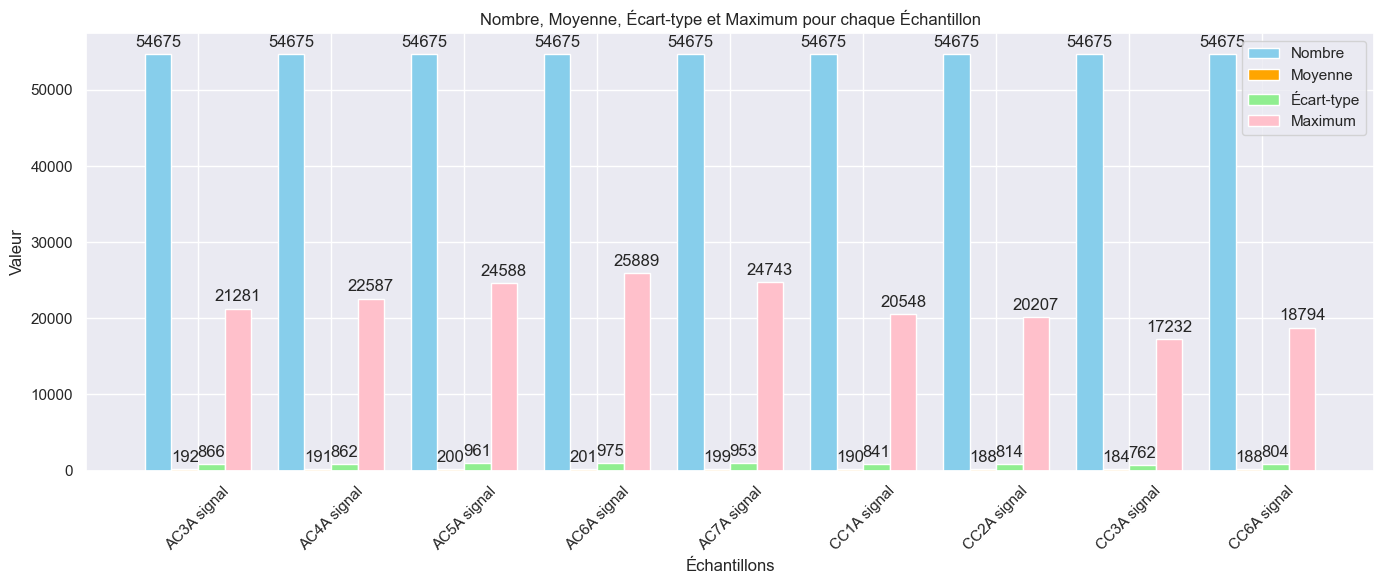

In [7]:
# Calculer les statistiques descriptives
stats = combined_df.describe()

# Sélectionner les statistiques d'intérêt
selected_stats = stats.loc[['count', 'mean', 'std', 'max']]

# Créer un diagramme à barres groupées
labels = selected_stats.columns
count_vals = selected_stats.loc['count']
mean_vals = selected_stats.loc['mean']
std_vals = selected_stats.loc['std']
max_vals = selected_stats.loc['max']

x = np.arange(len(labels))  # les labels de l'axe des x
width = 0.2  # la largeur des barres

fig, ax = plt.subplots(figsize=(14, 6))

rects1 = ax.bar(x - 1.5*width, count_vals, width, label='Nombre', color='skyblue')
rects2 = ax.bar(x - 0.5*width, mean_vals, width, label='Moyenne', color='orange')
rects3 = ax.bar(x + 0.5*width, std_vals, width, label='Écart-type', color='lightgreen')
rects4 = ax.bar(x + 1.5*width, max_vals, width, label='Maximum', color='pink')

# Ajouter du texte pour les labels, le titre et la légende
ax.set_xlabel('Échantillons')
ax.set_ylabel('Valeur')
ax.set_title('Nombre, Moyenne, Écart-type et Maximum pour chaque Échantillon')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Fonction pour ajouter les labels sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points de décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Appeler la fonction pour chaque groupe de barres
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Afficher le diagramme
plt.tight_layout()
plt.show()


In [8]:
combined_df.head()

,AC3A signal,AC4A signal,AC5A signal,AC6A signal,AC7A signal,CC1A signal,CC2A signal,CC3A signal,CC6A signal
Probe Set Name,,,,,,,,,
AFFX-BioB-5_at,239.1,249.3,243.6,293.0,257.2,347.1,287.9,254.6,235.7
AFFX-BioB-M_at,438.0,405.7,513.1,498.9,467.7,552.4,477.3,320.0,355.1
AFFX-BioB-3_at,269.7,237.3,312.5,334.3,252.9,318.2,279.9,228.9,256.0
AFFX-BioC-5_at,665.1,622.3,773.4,788.9,751.3,907.4,770.1,586.7,581.9
AFFX-BioC-3_at,837.4,818.7,914.4,1030.9,952.2,1220.7,1025.4,793.0,788.6


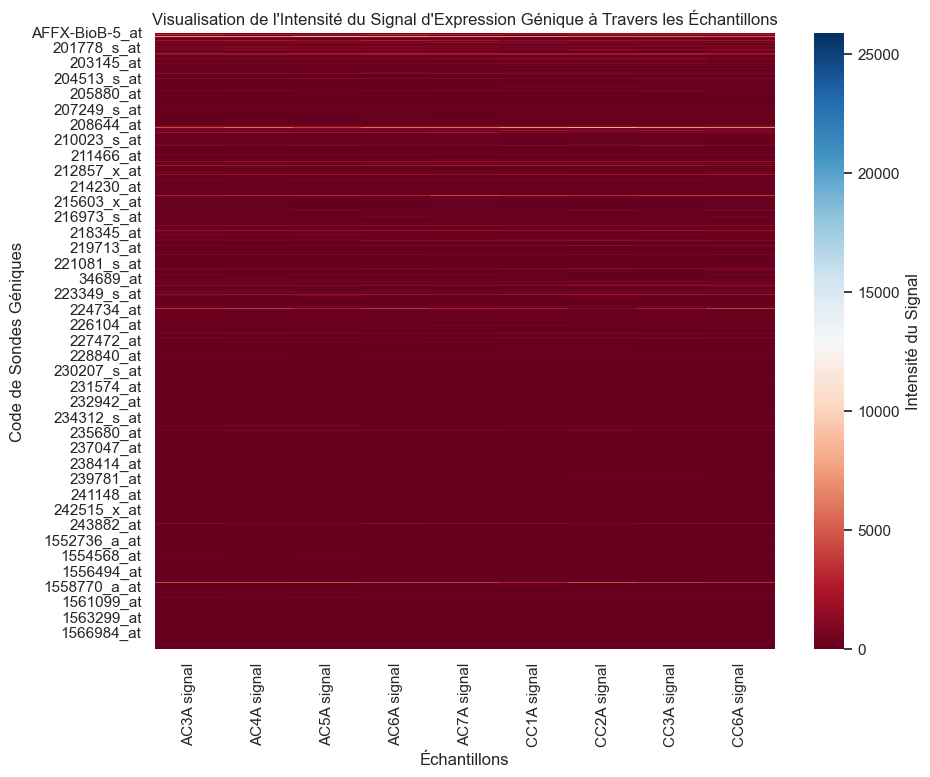

In [9]:
# Créer une heatmap sans clustering
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(combined_df, cmap="RdBu", cbar_kws={'label': 'Intensité du Signal'})
plt.title("Visualisation de l'Intensité du Signal d'Expression Génique à Travers les Échantillons")
plt.xlabel("Échantillons")
plt.ylabel("Code de Sondes Géniques")
plt.show()

La sélection des gènes les plus variant est une étape cruciale dans l'analyse des données génomiques, en particulier dans les études d'expression génique 
Normalisation avec le Z-score

Étape 1: Z-Score Normalization

In [10]:
from scipy.stats import zscore

# Normalisation Z-Score
zscore_normalized_df = combined_df.apply(zscore)


In [11]:
acyonotique_samples = ['AC3A signal', 'AC4A signal', 'AC5A signal', 'AC6A signal', 'AC7A signal']
cyonotique_samples = ['CC1A signal', 'CC2A signal', 'CC3A signal', 'CC6A signal']


Étape 2: Analyse Statistique des Gènes Différentiellement Exprimés

In [12]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Séparation des échantillons acyonotiques et cyonotiques
acyonotique_df_zscore = zscore_normalized_df[acyonotique_samples]
cyonotique_df_zscore = zscore_normalized_df[cyonotique_samples]

# Liste pour stocker les p-values
p_values = []

for gene in zscore_normalized_df.index:
    acyonotique_expression = acyonotique_df_zscore.loc[gene]
    cyonotique_expression = cyonotique_df_zscore.loc[gene]
    
    t_stat, p_val = stats.ttest_ind(acyonotique_expression, cyonotique_expression)
    p_values.append(p_val)

# Ajouter les p-values au DataFrame
zscore_normalized_df['p_value'] = p_values

# Correction de Benjamini-Hochberg
rejected, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

zscore_normalized_df['corrected_p_value'] = corrected_p_values

alpha = 0.05
differentially_expressed_genes = zscore_normalized_df[zscore_normalized_df['corrected_p_value'] < alpha].index.tolist()

# Créer un DataFrame à partir de la liste des gènes différentiellement exprimés après la normalisation Z-Score
de_genes_df_zscore = pd.DataFrame(differentially_expressed_genes, columns=['Gènes Différentiellement Exprimés après Z-Score'])

# Afficher le DataFrame
print(de_genes_df_zscore)


      Gènes Différentiellement Exprimés après Z-Score
0                                     AFFX-BioDn-3_at
1                                AFFX-r2-Ec-bioB-M_at
2                                AFFX-r2-Ec-bioB-3_at
3                          AFFX-HUMISGF3A/M97935_3_at
4                                    AFFX-M27830_5_at
...                                               ...
13221                                      1570621_at
13222                                      1570625_at
13223                                      1570629_at
13224                                      1570630_at
13225                                      1570635_at

[13226 rows x 1 columns]


analyse de la variance cumulée sur de_genes_df_zscore après la normalisation Z-Score.

Étape 1: Calcul de la variance pour chaque gène dans de_genes_df_zscore

In [13]:
# Extraire les données de zscore_normalized_df pour les gènes de de_genes_df_zscore
selected_genes_df_zscore = zscore_normalized_df.loc[de_genes_df_zscore['Gènes Différentiellement Exprimés après Z-Score']]

# Calculer la variance pour chaque gène
gene_variances_zscore = selected_genes_df_zscore.var(axis=1)

# Trier les gènes par leur variance en ordre décroissant
sorted_gene_variances_zscore = gene_variances_zscore.sort_values(ascending=False)


Étape 2: Calcul de la variance cumulée

In [14]:
# Calculer la variance cumulée
cumulative_variance_zscore = sorted_gene_variances_zscore.cumsum()
total_variance_zscore = sorted_gene_variances_zscore.sum()
cumulative_variance_percentage_zscore = 100 * cumulative_variance_zscore / total_variance_zscore


Étape 3: Tracer la variance cumulée et identifier le point du coude

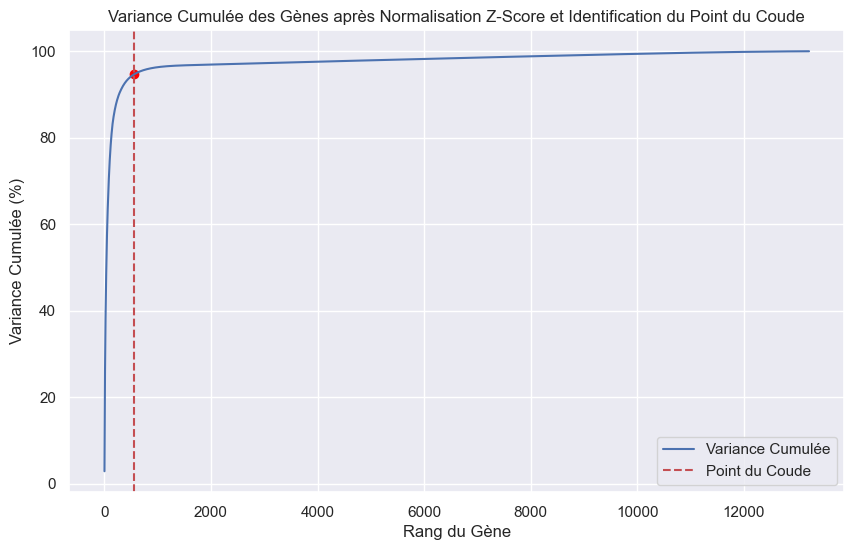

Le point du coude est au rang 560, expliquant 94.69% de la variance.


In [16]:
# Calculer le point du coude
x1, y1 = 1, cumulative_variance_percentage_zscore.iloc[0]
x2, y2 = len(cumulative_variance_percentage_zscore), cumulative_variance_percentage_zscore.iloc[-1]
distances = []
for i in range(len(cumulative_variance_percentage_zscore)):
    x0, y0 = i+1, cumulative_variance_percentage_zscore.iloc[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2-y1)**2 + (x2-x1)**2)**0.5
    distances.append(numerator/denominator)
idx_elbow = np.argmax(distances)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_percentage_zscore) + 1), cumulative_variance_percentage_zscore.values, label='Variance Cumulée')
plt.title('Variance Cumulée des Gènes après Normalisation Z-Score et Identification du Point du Coude')
plt.xlabel('Rang du Gène')
plt.ylabel('Variance Cumulée (%)')
plt.axvline(x=idx_elbow + 1, color='r', linestyle='--', label='Point du Coude')
plt.scatter(idx_elbow + 1, cumulative_variance_percentage_zscore.iloc[idx_elbow], color='red')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du Point du Coude
print(f"Le point du coude est au rang {idx_elbow + 1}, expliquant {cumulative_variance_percentage_zscore.iloc[idx_elbow]:.2f}% de la variance.")


Étape 1: Calculer la variance pour les 560 gènes

In [17]:
# Calculer la variance pour les 560 gènes de selected_genes_df_zscore
gene_variance_zscore = selected_genes_df_zscore.var(axis=1)



Étape 2: Sélectionner les N gènes les plus variant

In [18]:
N = 100
top_N_genes_idx_zscore = gene_variance_zscore.sort_values(ascending=False).head(N).index
top_N_genes_df_zscore = selected_genes_df_zscore.loc[top_N_genes_idx_zscore]



Méthode 1:Étape 3: Clustering hiérarchique et Heatmap

<Figure size 1200x1000 with 0 Axes>

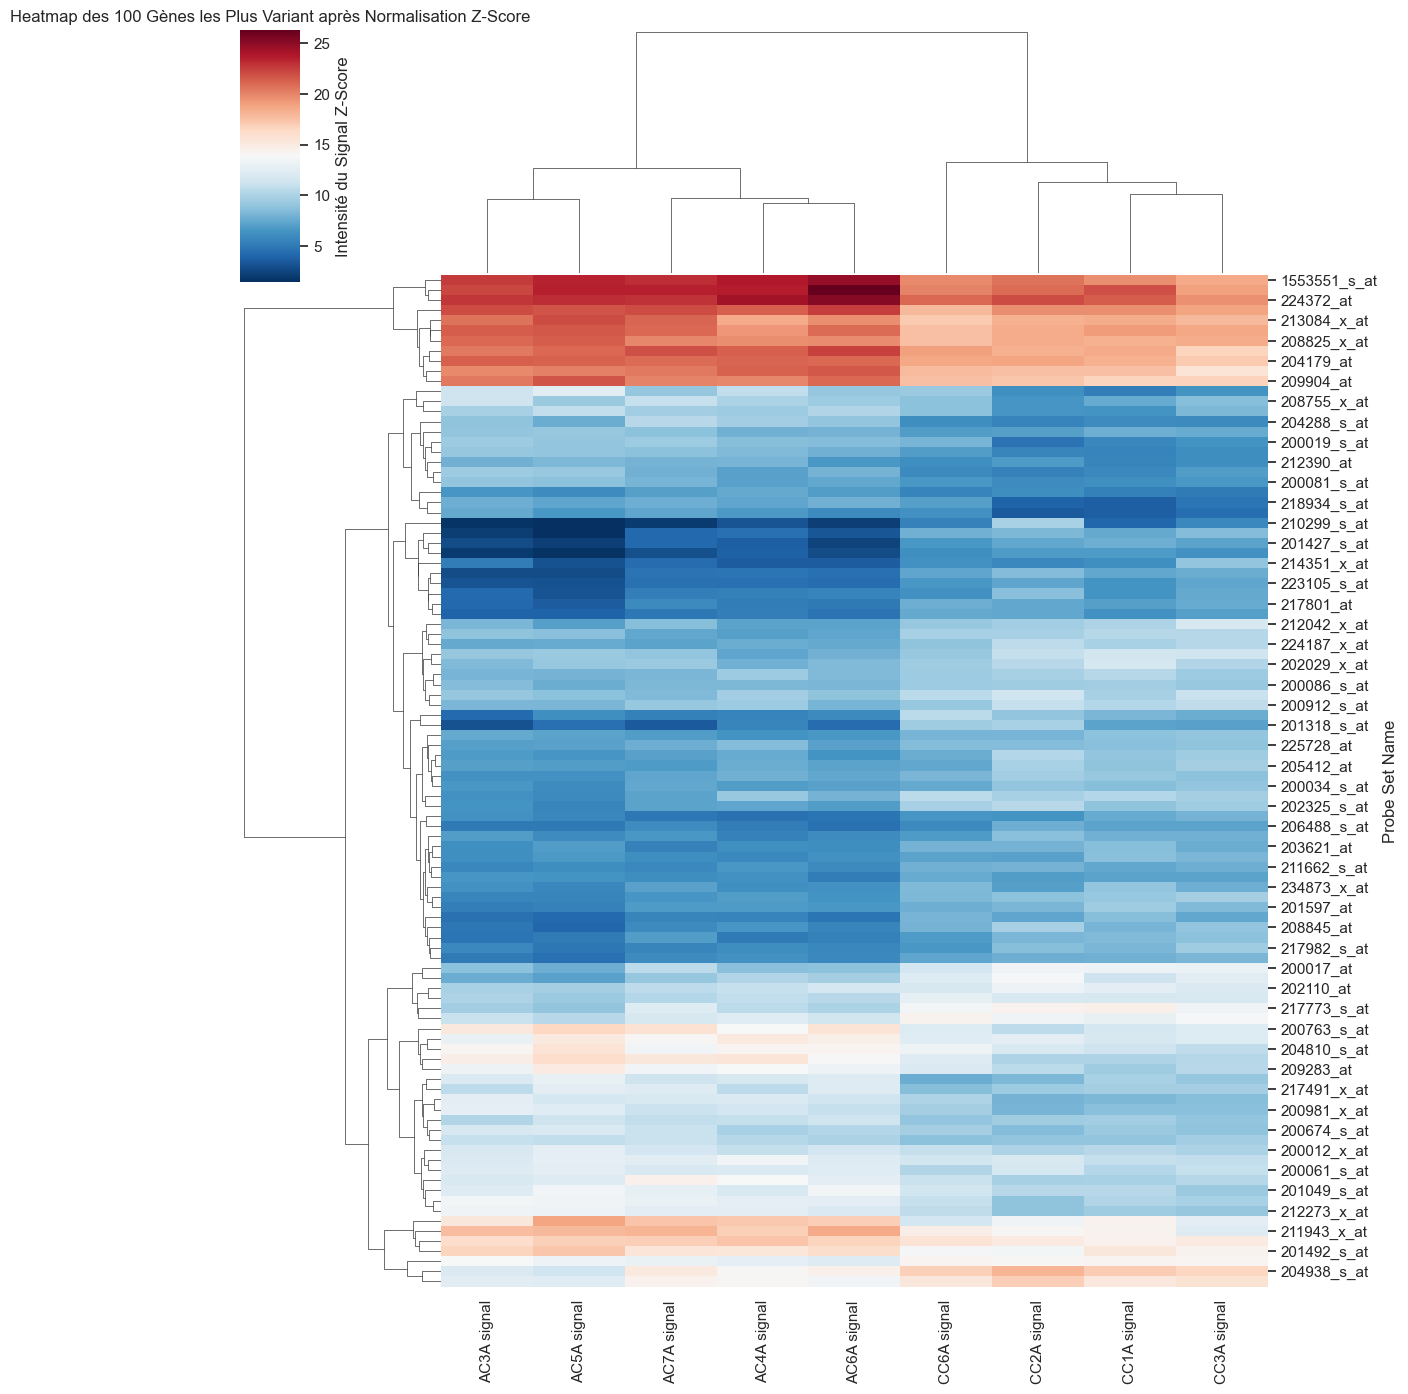

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclure les colonnes p_value et corrected_p_value
heatmap_data = top_N_genes_df_zscore.drop(columns=['p_value', 'corrected_p_value'], errors='ignore')

# Création de la heatmap avec clustering hiérarchique
plt.figure(figsize=(12, 10))
sns.clustermap(heatmap_data, method='average', cmap='RdBu_r', row_cluster=True, col_cluster=True, figsize=(12, 14), cbar_kws={'label': 'Intensité du Signal Z-Score'})
plt.title('Heatmap des 100 Gènes les Plus Variant après Normalisation Z-Score')
plt.show()



Méthode 2 :  le K-means clustering

Étape 1: Déterminer le nombre optimal de clusters (K) avec la méthode du coude

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

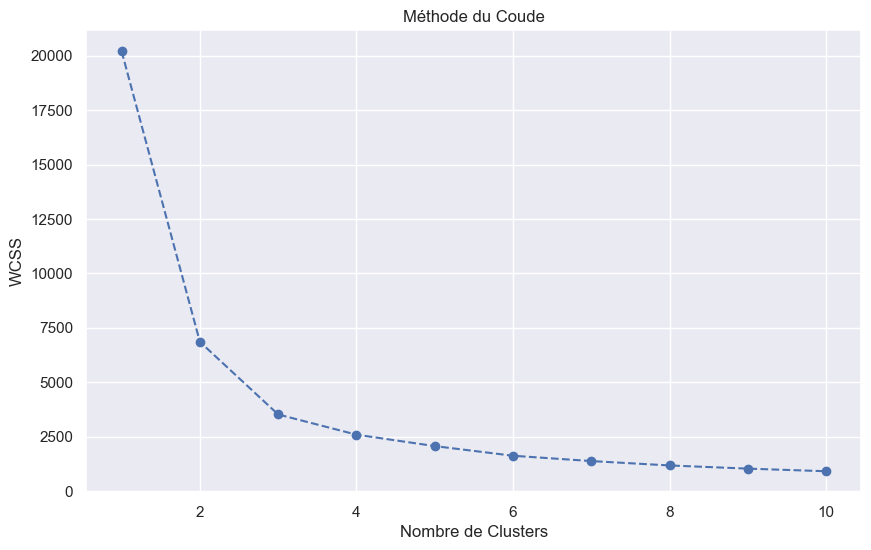

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculer la somme des carrés des distances pour différents nombres de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(heatmap_data)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Étape 2: Appliquer le K-means clustering

In [21]:
optimal_k = 3  # Remplacez par le nombre que vous avez déterminé à partir de la méthode du coude
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(heatmap_data)

# Ajouter les labels des clusters au DataFrame
heatmap_data['Cluster'] = clusters


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Étape 3: Visualisation avec une heatmap

<Figure size 1200x1000 with 0 Axes>

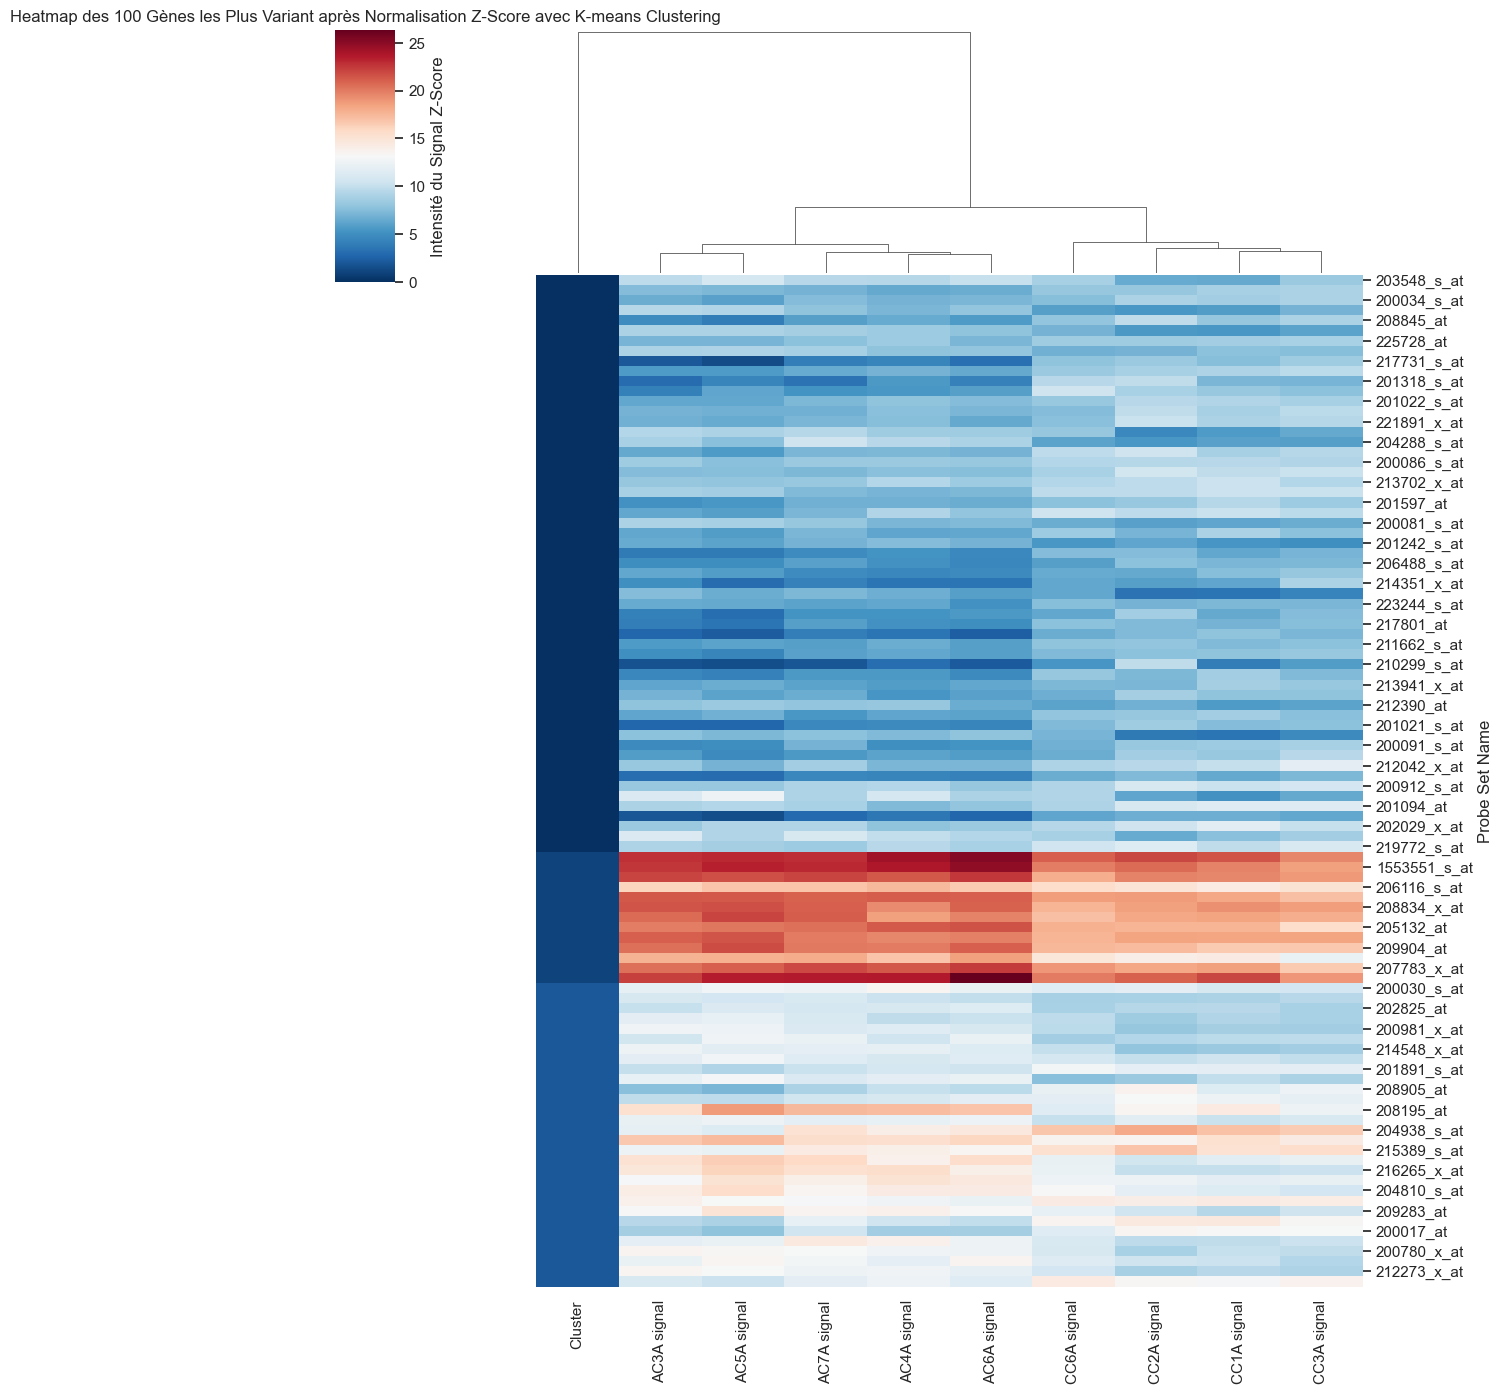

In [22]:
plt.figure(figsize=(12, 10))
sns.clustermap(heatmap_data.sort_values('Cluster'), method='average', cmap='RdBu_r', row_cluster=False, col_cluster=True, figsize=(12, 14), cbar_kws={'label': 'Intensité du Signal Z-Score'})
plt.title('Heatmap des 100 Gènes les Plus Variant après Normalisation Z-Score avec K-means Clustering')
plt.show()


Normalisation Min-Max :

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation Min-Max
scaler = MinMaxScaler()
minmax_normalized_df = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns, index=combined_df.index)

acyonotique_samples = ['AC3A signal', 'AC4A signal', 'AC5A signal', 'AC6A signal', 'AC7A signal']
cyonotique_samples = ['CC1A signal', 'CC2A signal', 'CC3A signal', 'CC6A signal']

# Séparation des échantillons acyonotiques et cyonotiques
acyonotique_df_minmax = minmax_normalized_df[acyonotique_samples]
cyonotique_df_minmax = minmax_normalized_df[cyonotique_samples]

# Liste pour stocker les p-values
p_values = []

for gene in minmax_normalized_df.index:
    acyonotique_expression = acyonotique_df_minmax.loc[gene]
    cyonotique_expression = cyonotique_df_minmax.loc[gene]
    
    t_stat, p_val = stats.ttest_ind(acyonotique_expression, cyonotique_expression)
    p_values.append(p_val)

# Ajouter les p-values au DataFrame
minmax_normalized_df['p_value'] = p_values

# Correction de Benjamini-Hochberg
rejected, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

minmax_normalized_df['corrected_p_value'] = corrected_p_values

alpha = 0.05
differentially_expressed_genes = minmax_normalized_df[minmax_normalized_df['corrected_p_value'] < alpha].index.tolist()

# Créer un DataFrame à partir de la liste des gènes différentiellement exprimés après la normalisation Min-Max
de_genes_df_minmax = pd.DataFrame(differentially_expressed_genes, columns=['Gènes Différentiellement Exprimés après Min-Max'])

# Afficher le DataFrame
print(de_genes_df_minmax)

     Gènes Différentiellement Exprimés après Min-Max
0                                     AFFX-BioB-5_at
1                                    AFFX-BioDn-3_at
2                                     AFFX-CreX-3_at
3                               AFFX-r2-Ec-bioB-M_at
4                               AFFX-r2-Ec-bioB-3_at
...                                              ...
3534                                      1570064_at
3535                                      1570237_at
3536                                      1570251_at
3537                                      1570410_at
3538                                    1570515_a_at

[3539 rows x 1 columns]


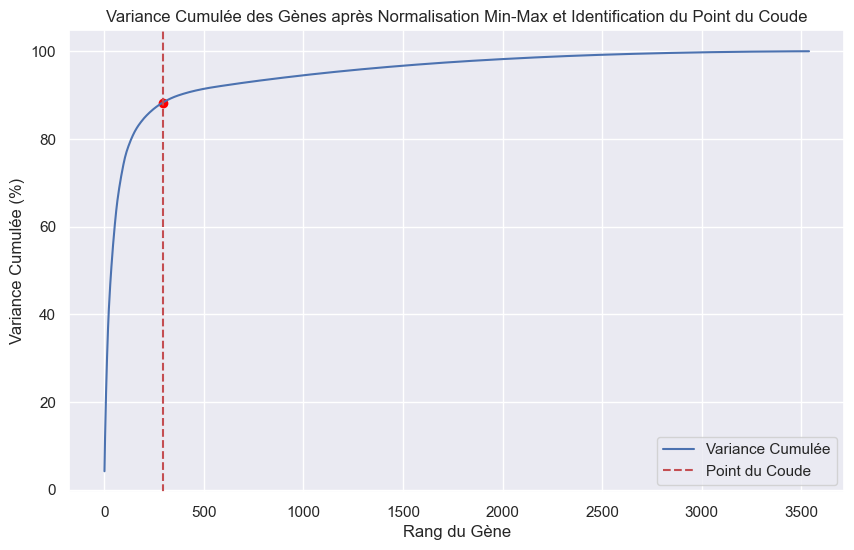

Le point du coude est au rang 293, expliquant 88.28% de la variance.


In [24]:
# Extraire les données de minmax_normalized_df pour les gènes de de_genes_df_minmax
selected_genes_df_minmax = minmax_normalized_df.loc[de_genes_df_minmax['Gènes Différentiellement Exprimés après Min-Max']]

# Calculer la variance pour chaque gène
gene_variances_minmax = selected_genes_df_minmax.var(axis=1)

# Trier les gènes par leur variance en ordre décroissant
sorted_gene_variances_minmax = gene_variances_minmax.sort_values(ascending=False)

# Calculer la variance cumulée
cumulative_variance_minmax = sorted_gene_variances_minmax.cumsum()
total_variance_minmax = sorted_gene_variances_minmax.sum()
cumulative_variance_percentage_minmax = 100 * cumulative_variance_minmax / total_variance_minmax

# Calculer le point du coude
x1, y1 = 1, cumulative_variance_percentage_minmax.iloc[0]
x2, y2 = len(cumulative_variance_percentage_minmax), cumulative_variance_percentage_minmax.iloc[-1]
distances = []
for i in range(len(cumulative_variance_percentage_minmax)):
    x0, y0 = i+1, cumulative_variance_percentage_minmax.iloc[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2-y1)**2 + (x2-x1)**2)**0.5
    distances.append(numerator/denominator)
idx_elbow = np.argmax(distances)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_percentage_minmax) + 1), cumulative_variance_percentage_minmax.values, label='Variance Cumulée')
plt.title('Variance Cumulée des Gènes après Normalisation Min-Max et Identification du Point du Coude')
plt.xlabel('Rang du Gène')
plt.ylabel('Variance Cumulée (%)')
plt.axvline(x=idx_elbow + 1, color='r', linestyle='--', label='Point du Coude')
plt.scatter(idx_elbow + 1, cumulative_variance_percentage_minmax.iloc[idx_elbow], color='red')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du Point du Coude
print(f"Le point du coude est au rang {idx_elbow + 1}, expliquant {cumulative_variance_percentage_minmax.iloc[idx_elbow]:.2f}% de la variance.")

<Figure size 1200x1000 with 0 Axes>

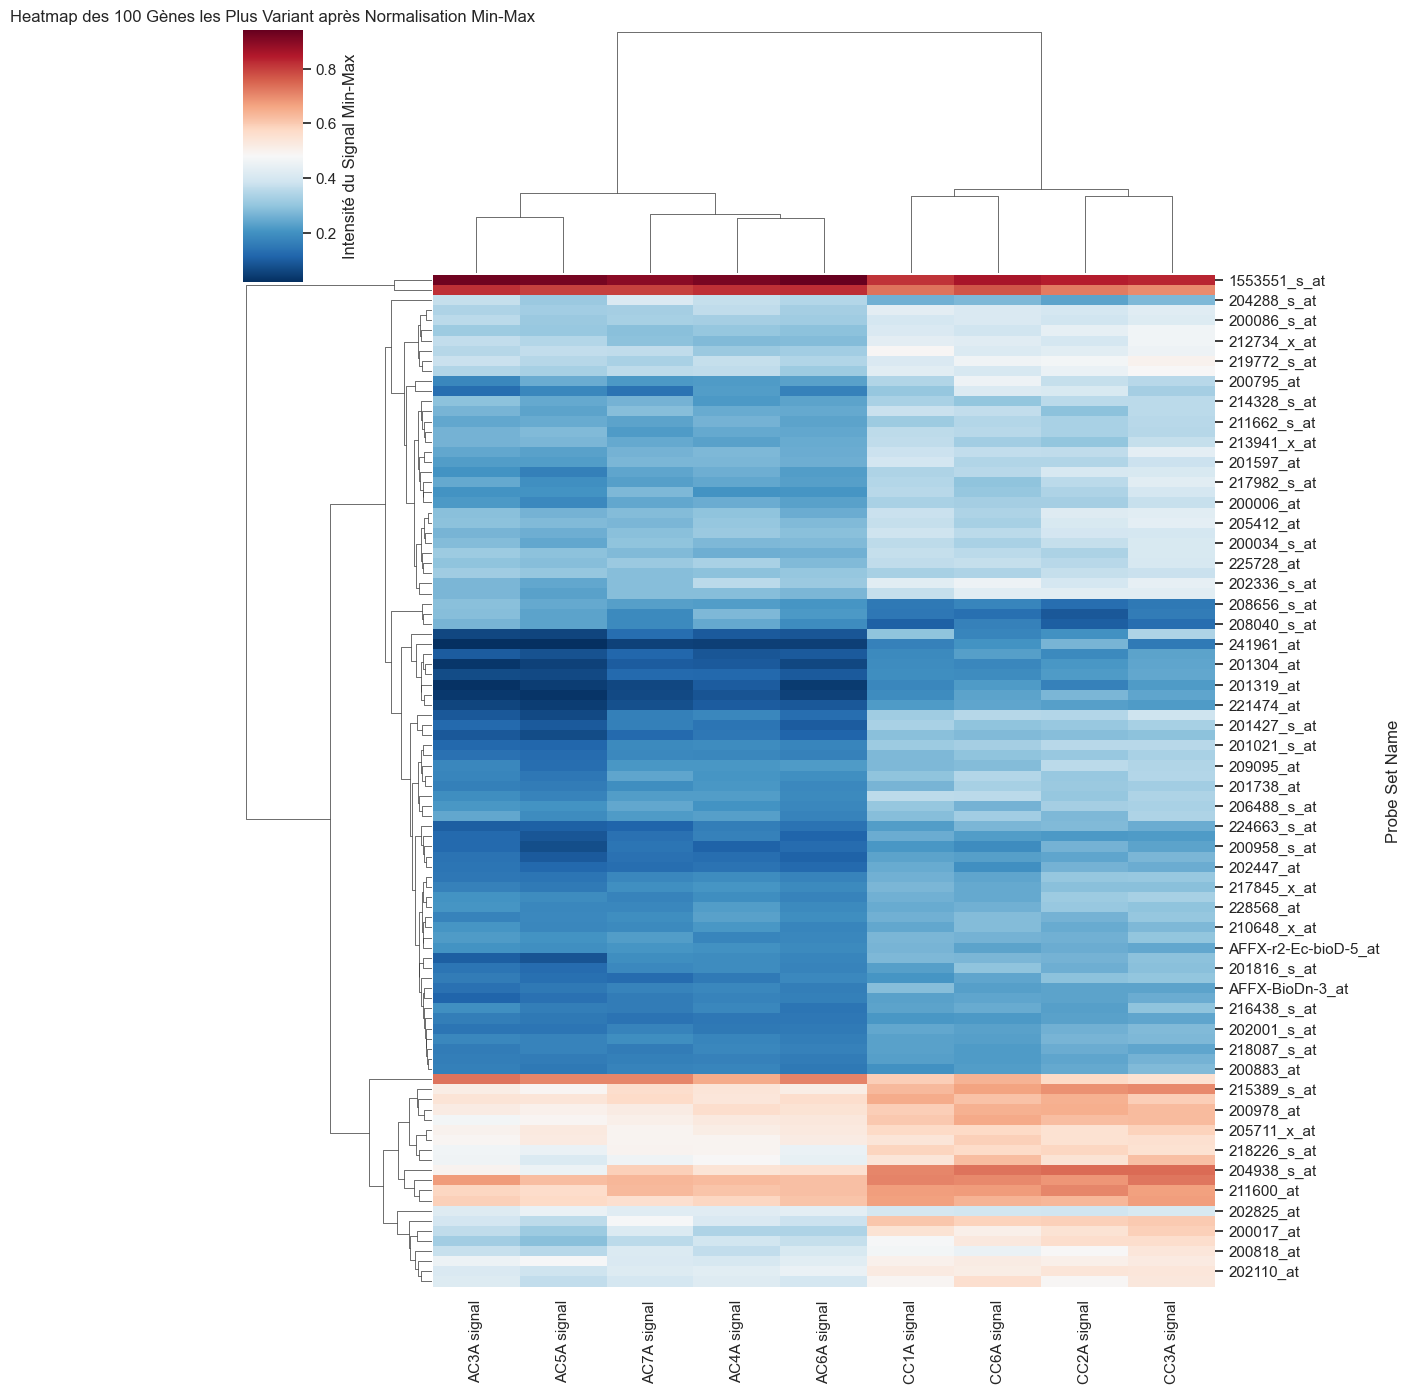

In [26]:
# Calculer la variance pour les 293 gènes de selected_genes_df_minmax
gene_variance_minmax = selected_genes_df_minmax.var(axis=1)

# Sélectionner les 100 gènes les plus variant
N = 100
top_N_genes_idx_minmax = gene_variance_minmax.sort_values(ascending=False).head(N).index
top_N_genes_df_minmax = selected_genes_df_minmax.loc[top_N_genes_idx_minmax]

# Exclure les colonnes p_value et corrected_p_value
heatmap_data_minmax = top_N_genes_df_minmax.drop(columns=['p_value', 'corrected_p_value'], errors='ignore')

# Création de la heatmap avec clustering hiérarchique
plt.figure(figsize=(12, 10))
sns.clustermap(heatmap_data_minmax, method='average', cmap='RdBu_r', row_cluster=True, col_cluster=True, figsize=(12, 14), cbar_kws={'label': 'Intensité du Signal Min-Max'})
plt.title('Heatmap des 100 Gènes les Plus Variant après Normalisation Min-Max')
plt.show()





<<<Quantile Transformation :

In [27]:
from sklearn.preprocessing import QuantileTransformer

# Normalisation par transformation par quantiles
qt = QuantileTransformer(output_distribution='normal')
quantile_normalized_df = pd.DataFrame(qt.fit_transform(combined_df), columns=combined_df.columns, index=combined_df.index)

acyonotique_samples = ['AC3A signal', 'AC4A signal', 'AC5A signal', 'AC6A signal', 'AC7A signal']
cyonotique_samples = ['CC1A signal', 'CC2A signal', 'CC3A signal', 'CC6A signal']

# Séparation des échantillons acyonotiques et cyonotiques
acyonotique_df_quantile = quantile_normalized_df[acyonotique_samples]
cyonotique_df_quantile = quantile_normalized_df[cyonotique_samples]

# Liste pour stocker les p-values
p_values = []

for gene in quantile_normalized_df.index:
    acyonotique_expression = acyonotique_df_quantile.loc[gene]
    cyonotique_expression = cyonotique_df_quantile.loc[gene]
    
    t_stat, p_val = stats.ttest_ind(acyonotique_expression, cyonotique_expression)
    p_values.append(p_val)

# Ajouter les p-values au DataFrame
quantile_normalized_df['p_value'] = p_values

# Correction de Benjamini-Hochberg
rejected, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

quantile_normalized_df['corrected_p_value'] = corrected_p_values

alpha = 0.05
differentially_expressed_genes = quantile_normalized_df[quantile_normalized_df['corrected_p_value'] < alpha].index.tolist()

# Créer un DataFrame à partir de la liste des gènes différentiellement exprimés après la transformation par quantiles
de_genes_df_quantile = pd.DataFrame(differentially_expressed_genes, columns=['Gènes Différentiellement Exprimés après Quantile Transformation'])

# Afficher le DataFrame
print(de_genes_df_quantile)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12108\1856858331.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(acyonotique_expression, cyonotique_expression)


    Gènes Différentiellement Exprimés après Quantile Transformation
0                                     AFFX-M27830_5_at             
1                                          200000_s_at             
2                                            200053_at             
3                                          200056_s_at             
4                                          200057_s_at             
..                                                 ...             
956                                         1566452_at             
957                                         1568287_at             
958                                       1568629_s_at             
959                                         1569234_at             
960                                       1570515_a_at             

[961 rows x 1 columns]


In [28]:
# Afficher le DataFrame
print(de_genes_df_quantile)

    Gènes Différentiellement Exprimés après Quantile Transformation
0                                     AFFX-M27830_5_at             
1                                          200000_s_at             
2                                            200053_at             
3                                          200056_s_at             
4                                          200057_s_at             
..                                                 ...             
956                                         1566452_at             
957                                         1568287_at             
958                                       1568629_s_at             
959                                         1569234_at             
960                                       1570515_a_at             

[961 rows x 1 columns]


In [30]:
# Supposons que votre DataFrame après la "Quantile Transformation" soit nommé `quantile_normalized_df`

# Calculer la variance pour les 1106 gènes de selected_genes_df_quantile
gene_variance_quantile = selected_genes_df_quantile.var(axis=1)

# Sélectionner les 100 gènes les plus variant
N = 100
top_N_genes_idx_quantile = gene_variance_quantile.sort_values(ascending=False).head(N).index
top_N_genes_df_quantile = selected_genes_df_quantile.loc[top_N_genes_idx_quantile]

# Exclure les colonnes p_value et corrected_p_value
heatmap_data_quantile = top_N_genes_df_quantile.drop(columns=['p_value', 'corrected_p_value'], errors='ignore')

# Création de la heatmap avec clustering hiérarchique
plt.figure(figsize=(12, 10))
sns.clustermap(heatmap_data_quantile, method='average', cmap='RdBu_r', row_cluster=True, col_cluster=True, figsize=(12, 14), cbar_kws={'label': 'Intensité du Signal Quantile'})
plt.title('Heatmap des 100 Gènes les Plus Variant après Normalisation Quantile')
plt.show()


NameError: name 'selected_genes_df_quantile' is not defined

In [31]:
top_N_genes_df_zscore

,AC3A signal,AC4A signal,AC5A signal,AC6A signal,AC7A signal,CC1A signal,CC2A signal,CC3A signal,CC6A signal,p_value,corrected_p_value
Probe Set Name,,,,,,,,,,,
224373_s_at,22.193732,23.680930,23.539759,26.320639,23.571045,21.930869,20.929464,18.945938,20.004743,0.008722,0.044372
224372_at,22.758796,24.303319,23.089553,25.203473,22.882574,21.428921,21.960413,19.590949,21.052155,0.006998,0.041961
1553551_s_at,22.618021,23.803877,23.420030,24.789006,23.040218,19.660520,20.648352,18.550876,19.883376,0.000256,0.017397
201429_s_at,22.029187,21.314904,21.666326,22.461636,22.010134,19.618938,19.647466,18.834282,17.939018,0.000225,0.016896
207783_x_at,20.395613,21.316064,21.005891,22.380587,21.850183,18.596984,18.288900,16.612433,19.005207,0.000990,0.026021
...,...,...,...,...,...,...,...,...,...,...,...
206488_s_at,5.002731,5.170505,4.994641,4.541993,6.021968,7.178347,7.794131,7.250860,5.927050,0.003687,0.036318
201738_at,3.809831,5.298671,3.805255,4.659826,4.863923,6.304186,7.402832,7.007472,7.449235,0.000424,0.019977
201242_s_at,6.515607,7.478770,6.077508,6.958199,6.966255,5.387729,6.168933,5.082150,5.533105,0.007156,0.042195


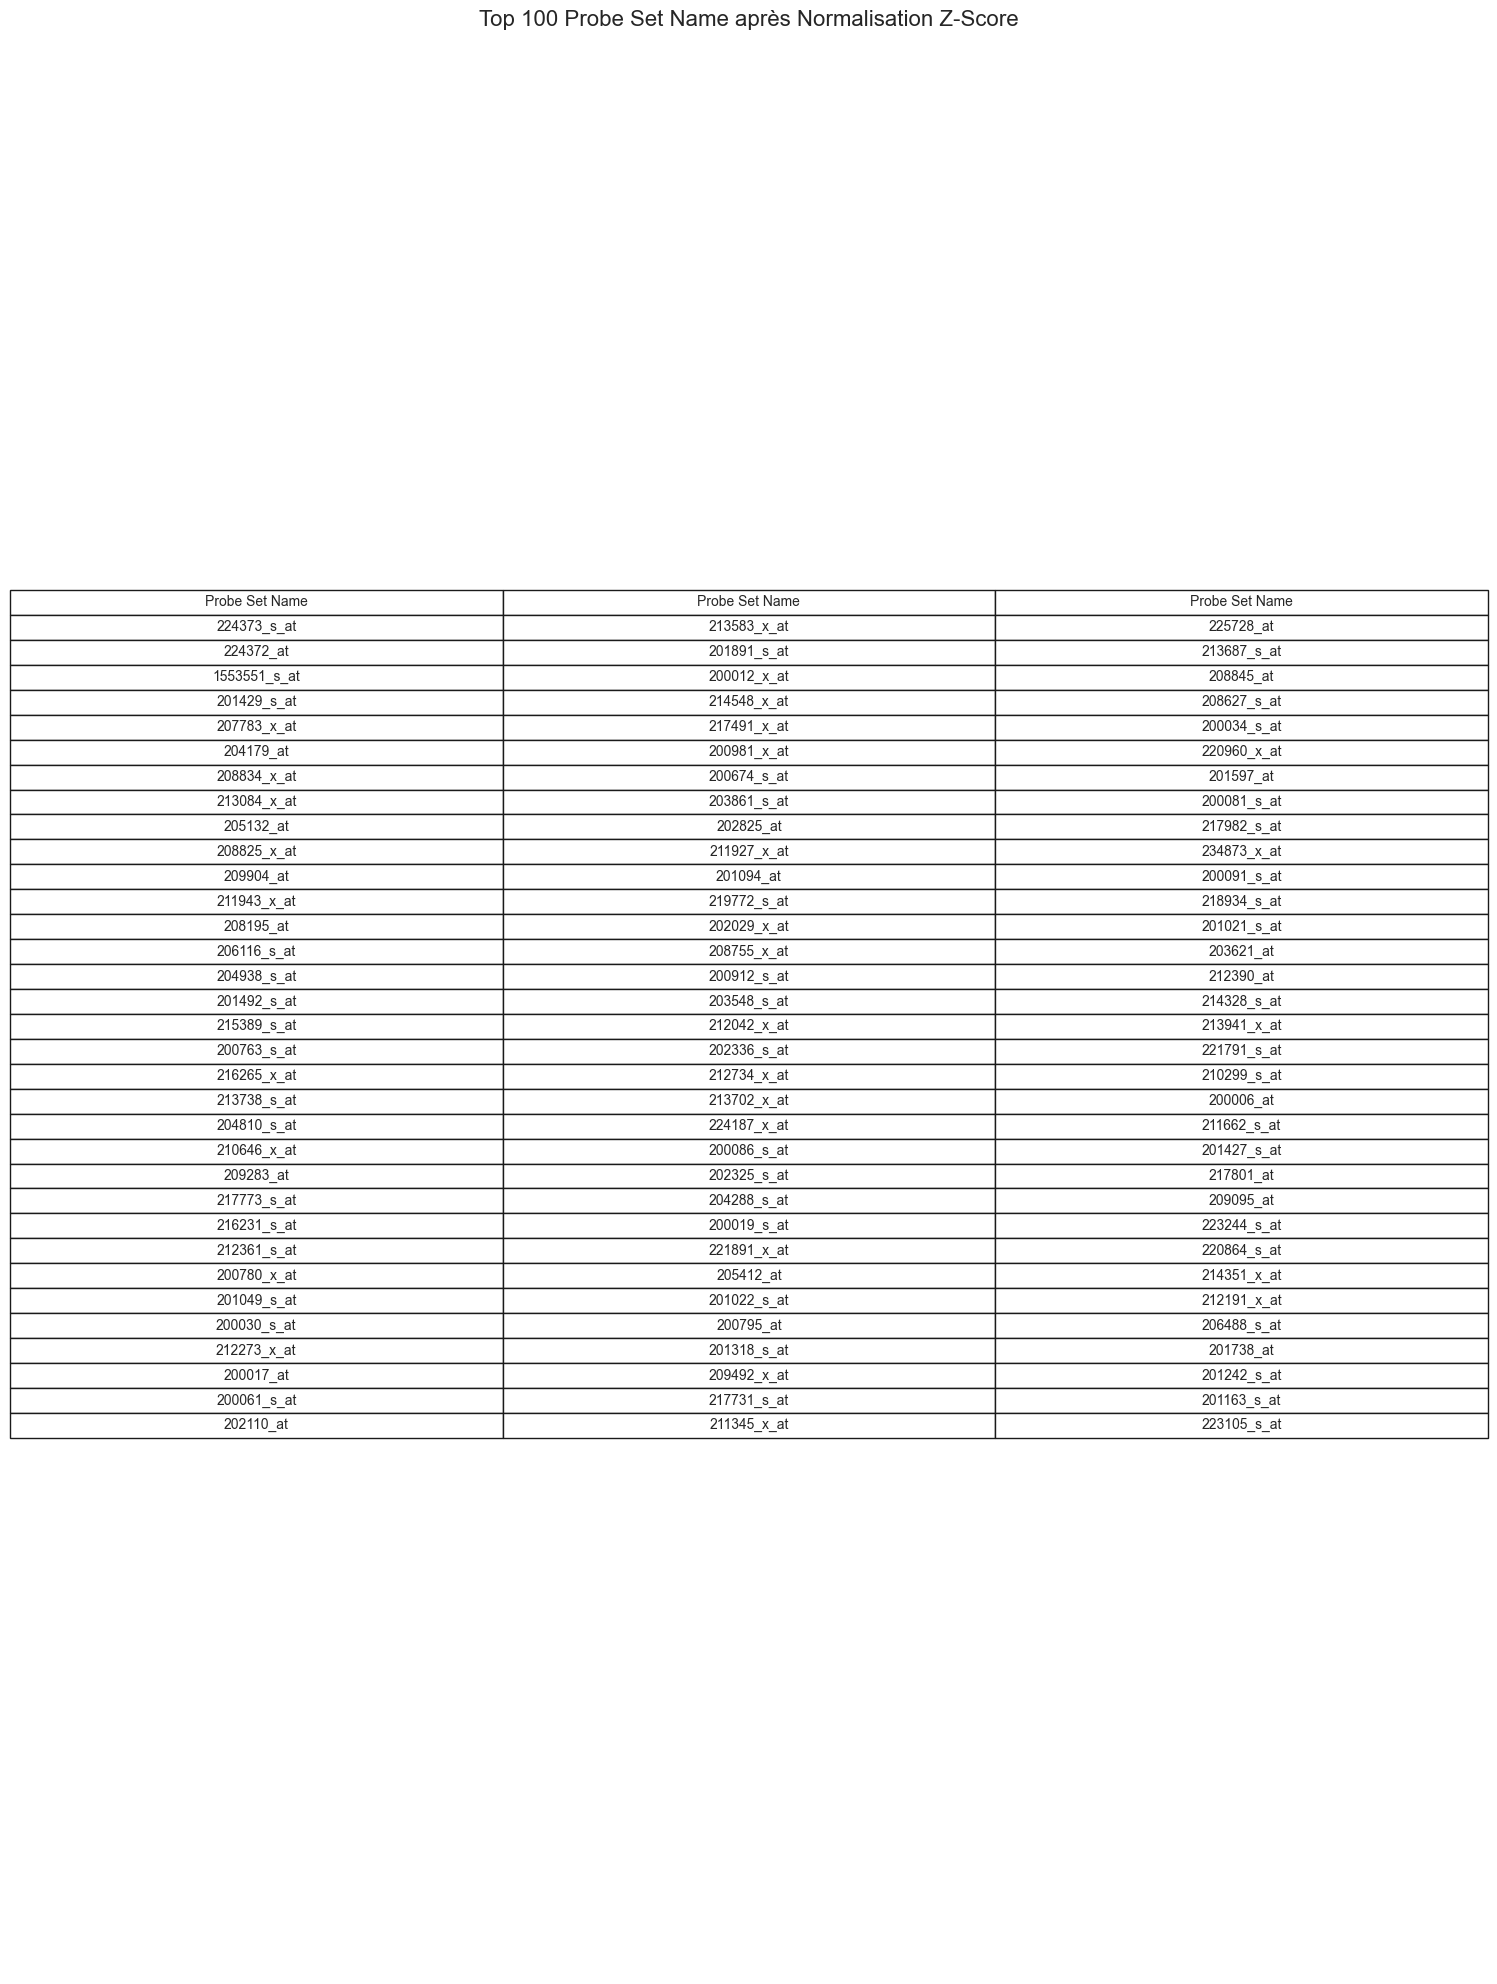

In [46]:
import matplotlib.pyplot as plt

# Extraire les "Probe Set Name" de top_N_genes_df_zscore
probe_set_names = top_N_genes_df_zscore.index.tolist()

# Nombre de colonnes souhaité
num_cols = 3

# Diviser la liste des noms en plusieurs colonnes
probe_set_names_split = np.array_split(probe_set_names, num_cols)

# Créer une figure pour afficher les noms
fig, ax = plt.subplots(figsize=(15, 20))  # Ajustez la taille selon vos besoins
ax.axis('off')

# Créer un tableau avec plusieurs colonnes
table_data = list(zip(*probe_set_names_split))
table = plt.table(cellText=table_data, colLabels=['Probe Set Name']*num_cols, cellLoc='center', loc='center')

# Ajuster la position du tableau pour qu'il soit plus proche du titre
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax.set_title('Top 100 Probe Set Name après Normalisation Z-Score', fontsize=16, pad=20)

# Afficher l'image
plt.tight_layout()
plt.show()







In [32]:
# Enregistrer la liste dans un fichier texte
with open('top_100_probe_set_names_zscore.txt', 'w') as file:
    for name in probe_set_names:
        file.write(name + '\n')

NameError: name 'probe_set_names' is not defined

In [33]:
import pandas as pd

data = [
    ["206116_s_at", "tropomyosin 1(TPM1)", "Homo sapiens"],
    ["217801_at", "ATP synthase F1 subunit epsilon(ATP5F1E)", "Homo sapiens"],
    ["200030_s_at", "solute carrier family 25 member 3(SLC25A3)", "Homo sapiens"],
    ["209283_at", "crystallin alpha B(CRYAB)", "Homo sapiens"],
    ["220960_x_at", "ribosomal protein L22(RPL22)", "Homo sapiens"],
    ["208825_x_at", "ribosomal protein L23a(RPL23A)", "Homo sapiens"],
    ["208834_x_at", "ribosomal protein L23a(RPL23A)", "Homo sapiens"],
    ["213084_x_at", "ribosomal protein L23a(RPL23A)", "Homo sapiens"],
    ["204810_s_at", "creatine kinase, M-type(CKM)", "Homo sapiens"],
    ["220864_s_at", "NADH:ubiquinone oxidoreductase subunit A13(NDUFA13)", "Homo sapiens"],
    ["209492_x_at", "ATP synthase membrane subunit e(ATP5ME)", "Homo sapiens"],
    ["202325_s_at", "ATP synthase peripheral stalk subunit F6(ATP5PF)", "Homo sapiens"],
    ["211943_x_at", "tumor protein, translationally-controlled 1(TPT1)", "Homo sapiens"],
    ["201427_s_at", "selenoprotein P(SELENOP)", "Homo sapiens"],
    ["200674_s_at", "ribosomal protein L32(RPL32)", "Homo sapiens"],
    ["216265_x_at", "myosin heavy chain 7(MYH7)", "Homo sapiens"],
    ["211345_x_at", "eukaryotic translation elongation factor 1 gamma(EEF1G)", "Homo sapiens"],
    ["211927_x_at", "eukaryotic translation elongation factor 1 gamma(EEF1G)", "Homo sapiens"],
    ["200019_s_at", "FAU ubiquitin like and ribosomal protein S30 fusion(FAU)", "Homo sapiens"],
    ["213687_s_at", "ribosomal protein L35a(RPL35A)", "Homo sapiens"],
    ["204288_s_at", "sorbin and SH3 domain containing 2(SORBS2)", "Homo sapiens"],
    ["225728_at", "sorbin and SH3 domain containing 2(SORBS2)", "Homo sapiens"],
    ["201429_s_at", "ribosomal protein L37a(RPL37A)", "Homo sapiens"],
    ["202029_x_at", "ribosomal protein L38(RPL38)", "Homo sapiens"],
    ["201022_s_at", "destrin, actin depolymerizing factor(DSTN)", "Homo sapiens"],
    ["201021_s_at", "destrin, actin depolymerizing factor(DSTN)", "Homo sapiens"],
    ["201492_s_at", "ribosomal protein L41(RPL41)", "Homo sapiens"],
    ["223244_s_at", "NADH:ubiquinone oxidoreductase subunit A12(NDUFA12)", "Homo sapiens"],
    ["200763_s_at", "ribosomal protein lateral stalk subunit P1(RPLP1)", "Homo sapiens"],
    ["201163_s_at", "insulin like growth factor binding protein 7(IGFBP7)", "Homo sapiens"],
    ["202825_at", "solute carrier family 25 member 4(SLC25A4)", "Homo sapiens"],
    ["205412_at", "acetyl-CoA acetyltransferase 1(ACAT1)", "Homo sapiens"],
    ["208627_s_at", "Y-box binding protein 1(YBX1)", "Homo sapiens"],
    ["217491_x_at", "COX7C pseudogene 1(COX7CP1)", "Homo sapiens"],
    ["213702_x_at", "N-acylsphingosine amidohydrolase 1(ASAH1)", "Homo sapiens"],
    ["221791_s_at", "translation machinery associated 7 homolog(TMA7)", "Homo sapiens"],
    ["200086_s_at", "cytochrome c oxidase subunit 4I1(COX4I1)", "Homo sapiens"],
    ["201738_at", "eukaryotic translation initiation factor 1B(EIF1B)", "Homo sapiens"],
    ["200081_s_at", "ribosomal protein S6(RPS6)", "Homo sapiens"],
    ["200006_at", "Parkinsonism associated deglycase(PARK7)", "Homo sapiens"],
    ["206488_s_at", "CD36 molecule(CD36)", "Homo sapiens"],
    ["217982_s_at", "mortality factor 4 like 1(MORF4L1)", "Homo sapiens"],
    ["200912_s_at", "eukaryotic translation initiation factor 4A2(EIF4A2)", "Homo sapiens"],
    ["216231_s_at", "beta-2-microglobulin(B2M)", "Homo sapiens"],
    ["201891_s_at", "beta-2-microglobulin(B2M)", "Homo sapiens"],
    ["204179_at", "myoglobin(MB)", "Homo sapiens"],
    ["203548_s_at", "lipoprotein lipase(LPL)", "Homo sapiens"],
    ["1553551_s_at", "mitochondrially encoded NADH dehydrogenase 2(MT-ND2)", "Homo sapiens"],
    ["213941_x_at", "ribosomal protein S7(RPS7)", "Homo sapiens"],
    ["224373_s_at", "mitochondrially encoded NADH dehydrogenase 4(MT-ND4)", "Homo sapiens"],
    ["224372_at", "mitochondrially encoded NADH dehydrogenase 4(MT-ND4)", "Homo sapiens"],
    ["208905_at", "cytochrome c, somatic(CYCS)", "Homo sapiens"],
    ["223105_s_at", "transmembrane protein 14C(TMEM14C)", "Homo sapiens"],
    ["201597_at", "cytochrome c oxidase subunit 7A2(COX7A2)", "Homo sapiens"],
    ["202110_at", "cytochrome c oxidase subunit 7B(COX7B)", "Homo sapiens"],
    ["205132_at", "actin alpha cardiac muscle 1(ACTC1)", "Homo sapiens"],
    ["202336_s_at", "peptidylglycine alpha-amidating monooxygenase(PAM)", "Homo sapiens"],
    ["209095_at", "dihydrolipoamide dehydrogenase(DLD)", "Homo sapiens"],
    ["208755_x_at", "H3.3 histone A(H3-3A)", "Homo sapiens"],
    ["201049_s_at", "ribosomal protein S18(RPS18)", "Homo sapiens"],
    ["200795_at", "SPARC like 1(SPARCL1)", "Homo sapiens"],
    ["200061_s_at", "ribosomal protein S24(RPS24)", "Homo sapiens"],
    ["200091_s_at", "ribosomal protein S25(RPS25)", "Homo sapiens"],
    ["203861_s_at", "actinin alpha 2(ACTN2)", "Homo sapiens"],
    ["200017_at", "ribosomal protein S27a(RPS27A)", "Homo sapiens"],
    ["217773_s_at", "NDUFA4 mitochondrial complex associated(NDUFA4)", "Homo sapiens"],
    ["200780_x_at", "GNAS complex locus(GNAS)", "Homo sapiens"],
    ["212273_x_at", "GNAS complex locus(GNAS)", "Homo sapiens"],
    ["214548_x_at", "GNAS complex locus(GNAS)", "Homo sapiens"],
    ["200981_x_at", "GNAS complex locus(GNAS)", "Homo sapiens"],
    ["207783_x_at", "HECT, UBA and WWE domain containing E3 ubiquitin protein ligase 1(HUWE1)", "Homo sapiens"],
    ["201094_at", "ribosomal protein S29(RPS29)", "Homo sapiens"],
    ["209904_at", "troponin C1, slow skeletal and cardiac type(TNNC1)", "Homo sapiens"],
    ["210299_s_at", "four and a half LIM domains 1(FHL1)", "Homo sapiens"],
    ["201242_s_at", "ATPase Na+/K+ transporting subunit beta 1(ATP1B1)", "Homo sapiens"],
    ["210646_x_at", "ribosomal protein L13a(RPL13A)", "Homo sapiens"],
    ["215389_s_at", "troponin T2, cardiac type(TNNT2)", "Homo sapiens"],
    ["217731_s_at", "integral membrane protein 2B(ITM2B)", "Homo sapiens"],
    ["204938_s_at", "phospholamban(PLN)", "Homo sapiens"],
    ["203621_at", "NADH:ubiquinone oxidoreductase subunit B5(NDUFB5)", "Homo sapiens"],
    ["201318_s_at", "myosin light chain 12B(MYL12B)", "Homo sapiens"],
    ["212361_s_at", "ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 2(ATP2A2)", "Homo sapiens"],
    ["208195_at", "titin(TTN)", "Homo sapiens"],
    ["224187_x_at", "heat shock protein family A (Hsp70) member 8(HSPA8)", "Homo sapiens"],
    ["221891_x_at", "heat shock protein family A (Hsp70) member 8(HSPA8)", "Homo sapiens"],
    ["200034_s_at", "ribosomal protein L6(RPL6)", "Homo sapiens"],
    ["212390_at", "PDE4DIP pseudogene 2(PDE4DIPP2)", "Homo sapiens"],
    ["212042_x_at", "ribosomal protein L7(RPL7)", "Homo sapiens"],
    ["213738_s_at", "ATP synthase F1 subunit alpha(ATP5F1A)", "Homo sapiens"],
    ["200012_x_at", "ribosomal protein L21 pseudogene 28(RPL21P28)", "Homo sapiens"],
    ["234873_x_at", "ribosomal protein L7a(RPL7A)", "Homo sapiens"],
    ["214328_s_at", "heat shock protein 90 alpha family class A member 1(HSP90AA1)", "Homo sapiens"],
    ["211662_s_at", "voltage dependent anion channel 2(VDAC2)", "Homo sapiens"],
    ["212191_x_at", "ribosomal protein L13(RPL13)", "Homo sapiens"],
    ["212734_x_at", "ribosomal protein L13(RPL13)", "Homo sapiens"],
    ["218934_s_at", "heat shock protein family B (small) member 7(HSPB7)", "Homo sapiens"],
    ["208845_at", "voltage dependent anion channel 3(VDAC3)", "Homo sapiens"],
    ["219772_s_at", "small muscle protein X-linked(SMPX)", "Homo sapiens"],
    ["213583_x_at", "eukaryotic translation elongation factor 1 alpha 1 pseudogene 5(EEF1A1P5)", "Homo sapiens"],
    ["214351_x_at", "ribosomal protein L13 pseudogene 12(RPL13P12)", "Homo sapiens"]
]

# Créer un DataFrame à partir de la liste de données
df = pd.DataFrame(data, columns=["AFFYMETRIX_3PRIME_IVT_ID", "Name", "Species"])


In [76]:
df

,AFFYMETRIX_3PRIME_IVT_ID,Name,Species
0,206116_s_at,tropomyosin 1(TPM1),Homo sapiens
1,217801_at,ATP synthase F1 subunit epsilon(ATP5F1E),Homo sapiens
2,200030_s_at,solute carrier family 25 member 3(SLC25A3),Homo sapiens
3,209283_at,crystallin alpha B(CRYAB),Homo sapiens
4,220960_x_at,ribosomal protein L22(RPL22),Homo sapiens
...,...,...,...
95,218934_s_at,heat shock protein family B (small) member 7(H...,Homo sapiens
96,208845_at,voltage dependent anion channel 3(VDAC3),Homo sapiens
97,219772_s_at,small muscle protein X-linked(SMPX),Homo sapiens
98,213583_x_at,eukaryotic translation elongation factor 1 alp...,Homo sapiens


In [77]:
# Compter le nombre d'identifiants DAVID uniques
unique_david_ids = df['Name'].nunique()
print(f'Il y a {unique_david_ids} identifiants DAVID uniques dans le DataFrame.')

# Supprimer les doublons basés sur la colonne 'Name'
df_unique = df.drop_duplicates(subset='Name')

# Vérifier le nouveau nombre de lignes pour s'assurer que les doublons ont été supprimés
print(f'Le DataFrame sans doublons contient maintenant {df_unique.shape[0]} lignes.')


Il y a 88 identifiants DAVID uniques dans le DataFrame.
Le DataFrame sans doublons contient maintenant 88 lignes.


In [78]:
df_unique

,AFFYMETRIX_3PRIME_IVT_ID,Name,Species
0,206116_s_at,tropomyosin 1(TPM1),Homo sapiens
1,217801_at,ATP synthase F1 subunit epsilon(ATP5F1E),Homo sapiens
2,200030_s_at,solute carrier family 25 member 3(SLC25A3),Homo sapiens
3,209283_at,crystallin alpha B(CRYAB),Homo sapiens
4,220960_x_at,ribosomal protein L22(RPL22),Homo sapiens
...,...,...,...
95,218934_s_at,heat shock protein family B (small) member 7(H...,Homo sapiens
96,208845_at,voltage dependent anion channel 3(VDAC3),Homo sapiens
97,219772_s_at,small muscle protein X-linked(SMPX),Homo sapiens
98,213583_x_at,eukaryotic translation elongation factor 1 alp...,Homo sapiens


In [79]:
# Supposons que df_unique est votre DataFrame sans doublons
# Utiliser une expression régulière pour diviser la colonne 'Name' en deux
df_unique[['Gene_Name', 'Abbreviation']] = df_unique['Name'].str.extract(r'(.*)\((.*)\)')

# Afficher les premières lignes pour vérifier le résultat
print(df_unique[['Gene_Name', 'Abbreviation']].head())


                           Gene_Name Abbreviation
0                      tropomyosin 1         TPM1
1    ATP synthase F1 subunit epsilon      ATP5F1E
2  solute carrier family 25 member 3      SLC25A3
3                 crystallin alpha B        CRYAB
4              ribosomal protein L22        RPL22


C:\Users\MSI\AppData\Local\Temp\ipykernel_12108\886656752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[['Gene_Name', 'Abbreviation']] = df_unique['Name'].str.extract(r'(.*)\((.*)\)')
C:\Users\MSI\AppData\Local\Temp\ipykernel_12108\886656752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[['Gene_Name', 'Abbreviation']] = df_unique['Name'].str.extract(r'(.*)\((.*)\)')


In [80]:
df_unique

,AFFYMETRIX_3PRIME_IVT_ID,Name,Species,Gene_Name,Abbreviation
0,206116_s_at,tropomyosin 1(TPM1),Homo sapiens,tropomyosin 1,TPM1
1,217801_at,ATP synthase F1 subunit epsilon(ATP5F1E),Homo sapiens,ATP synthase F1 subunit epsilon,ATP5F1E
2,200030_s_at,solute carrier family 25 member 3(SLC25A3),Homo sapiens,solute carrier family 25 member 3,SLC25A3
3,209283_at,crystallin alpha B(CRYAB),Homo sapiens,crystallin alpha B,CRYAB
4,220960_x_at,ribosomal protein L22(RPL22),Homo sapiens,ribosomal protein L22,RPL22
...,...,...,...,...,...
95,218934_s_at,heat shock protein family B (small) member 7(H...,Homo sapiens,heat shock protein family B (small) member 7,HSPB7
96,208845_at,voltage dependent anion channel 3(VDAC3),Homo sapiens,voltage dependent anion channel 3,VDAC3
97,219772_s_at,small muscle protein X-linked(SMPX),Homo sapiens,small muscle protein X-linked,SMPX
98,213583_x_at,eukaryotic translation elongation factor 1 alp...,Homo sapiens,eukaryotic translation elongation factor 1 alp...,EEF1A1P5


In [81]:
# Supprimer les colonnes 'Name' et 'Species'
df_unique.drop(['Name', 'Species'], axis=1, inplace=True)

# Afficher les premières lignes pour vérifier le résultat
print(df_unique.head())


  AFFYMETRIX_3PRIME_IVT_ID                          Gene_Name Abbreviation
0              206116_s_at                      tropomyosin 1         TPM1
1                217801_at    ATP synthase F1 subunit epsilon      ATP5F1E
2              200030_s_at  solute carrier family 25 member 3      SLC25A3
3                209283_at                 crystallin alpha B        CRYAB
4              220960_x_at              ribosomal protein L22        RPL22


C:\Users\MSI\AppData\Local\Temp\ipykernel_12108\3227533904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.drop(['Name', 'Species'], axis=1, inplace=True)


In [82]:
df_unique

,AFFYMETRIX_3PRIME_IVT_ID,Gene_Name,Abbreviation
0,206116_s_at,tropomyosin 1,TPM1
1,217801_at,ATP synthase F1 subunit epsilon,ATP5F1E
2,200030_s_at,solute carrier family 25 member 3,SLC25A3
3,209283_at,crystallin alpha B,CRYAB
4,220960_x_at,ribosomal protein L22,RPL22
...,...,...,...
95,218934_s_at,heat shock protein family B (small) member 7,HSPB7
96,208845_at,voltage dependent anion channel 3,VDAC3
97,219772_s_at,small muscle protein X-linked,SMPX
98,213583_x_at,eukaryotic translation elongation factor 1 alp...,EEF1A1P5


In [83]:
# Supposons que top_N_genes_df_zscore est votre DataFrame qui contient une colonne 'Probe Set Name'
# et df_unique est votre autre DataFrame qui contient une colonne 'AFFYMETRIX_3PRIME_IVT_ID'.

# On effectue une jointure interne pour conserver uniquement les lignes correspondantes
final_df = pd.merge(top_N_genes_df_zscore, df_unique, left_on='Probe Set Name', right_on='AFFYMETRIX_3PRIME_IVT_ID', how='inner')

# Afficher les premières lignes pour vérifier le résultat
print(final_df.head())


   AC3A signal  AC4A signal  AC5A signal  AC6A signal  AC7A signal   
0    22.193732    23.680930    23.539759    26.320639    23.571045  \
1    22.618021    23.803877    23.420030    24.789006    23.040218   
2    22.029187    21.314904    21.666326    22.461636    22.010134   
3    20.395613    21.316064    21.005891    22.380587    21.850183   
4    21.300615    21.086409    21.207382    21.007567    20.904637   

   CC1A signal  CC2A signal  CC3A signal  CC6A signal   p_value   
0    21.930869    20.929464    18.945938    20.004743  0.008722  \
1    19.660520    20.648352    18.550876    19.883376  0.000256   
2    19.618938    19.647466    18.834282    17.939018  0.000225   
3    18.596984    18.288900    16.612433    19.005207  0.000990   
4    18.265876    18.756643    17.148149    18.651925  0.000053   

   corrected_p_value AFFYMETRIX_3PRIME_IVT_ID   
0           0.044372              224373_s_at  \
1           0.017397             1553551_s_at   
2           0.016896         

In [84]:
final_df

,AC3A signal,AC4A signal,AC5A signal,AC6A signal,AC7A signal,CC1A signal,CC2A signal,CC3A signal,CC6A signal,p_value,corrected_p_value,AFFYMETRIX_3PRIME_IVT_ID,Gene_Name,Abbreviation
0,22.193732,23.680930,23.539759,26.320639,23.571045,21.930869,20.929464,18.945938,20.004743,0.008722,0.044372,224373_s_at,mitochondrially encoded NADH dehydrogenase 4,MT-ND4
1,22.618021,23.803877,23.420030,24.789006,23.040218,19.660520,20.648352,18.550876,19.883376,0.000256,0.017397,1553551_s_at,mitochondrially encoded NADH dehydrogenase 2,MT-ND2
2,22.029187,21.314904,21.666326,22.461636,22.010134,19.618938,19.647466,18.834282,17.939018,0.000225,0.016896,201429_s_at,ribosomal protein L37a,RPL37A
3,20.395613,21.316064,21.005891,22.380587,21.850183,18.596984,18.288900,16.612433,19.005207,0.000990,0.026021,207783_x_at,"HECT, UBA and WWE domain containing E3 ubiquit...",HUWE1
4,21.300615,21.086409,21.207382,21.007567,20.904637,18.265876,18.756643,17.148149,18.651925,0.000053,0.013128,204179_at,myoglobin,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5.002731,5.170505,4.994641,4.541993,6.021968,7.178347,7.794131,7.250860,5.927050,0.003687,0.036318,206488_s_at,CD36 molecule,CD36
84,3.809831,5.298671,3.805255,4.659826,4.863923,6.304186,7.402832,7.007472,7.449235,0.000424,0.019977,201738_at,eukaryotic translation initiation factor 1B,EIF1B
85,6.515607,7.478770,6.077508,6.958199,6.966255,5.387729,6.168933,5.082150,5.533105,0.007156,0.042195,201242_s_at,ATPase Na+/K+ transporting subunit beta 1,ATP1B1
86,1.937055,3.653622,1.529881,2.697741,2.952064,6.767285,6.774962,6.315096,6.225991,0.000045,0.012707,201163_s_at,insulin like growth factor binding protein 7,IGFBP7


In [85]:
# Set 'AFFYMETRIX_3PRIME_IVT_ID' as the index of the DataFrame before dropping other columns
final_df.set_index('AFFYMETRIX_3PRIME_IVT_ID', inplace=True)


In [86]:
# Now you can safely drop 'p_value' and 'corrected_p_value' if they exist
columns_to_drop = ['p_value', 'corrected_p_value']
for column in columns_to_drop:
    if column in final_df.columns:
        final_df.drop(column, axis=1, inplace=True)

In [87]:
# Then reorder the columns to have 'Gene_Name' and 'Abbreviation' first
# Make sure these are the correct column names
cols = ['Gene_Name', 'Abbreviation'] + [col for col in final_df.columns if col not in ['Gene_Name', 'Abbreviation']]
final_df = final_df[cols]


In [88]:
final_df

,Gene_Name,Abbreviation,AC3A signal,AC4A signal,AC5A signal,AC6A signal,AC7A signal,CC1A signal,CC2A signal,CC3A signal,CC6A signal
AFFYMETRIX_3PRIME_IVT_ID,,,,,,,,,,,
224373_s_at,mitochondrially encoded NADH dehydrogenase 4,MT-ND4,22.193732,23.680930,23.539759,26.320639,23.571045,21.930869,20.929464,18.945938,20.004743
1553551_s_at,mitochondrially encoded NADH dehydrogenase 2,MT-ND2,22.618021,23.803877,23.420030,24.789006,23.040218,19.660520,20.648352,18.550876,19.883376
201429_s_at,ribosomal protein L37a,RPL37A,22.029187,21.314904,21.666326,22.461636,22.010134,19.618938,19.647466,18.834282,17.939018
207783_x_at,"HECT, UBA and WWE domain containing E3 ubiquit...",HUWE1,20.395613,21.316064,21.005891,22.380587,21.850183,18.596984,18.288900,16.612433,19.005207
204179_at,myoglobin,MB,21.300615,21.086409,21.207382,21.007567,20.904637,18.265876,18.756643,17.148149,18.651925
...,...,...,...,...,...,...,...,...,...,...,...
206488_s_at,CD36 molecule,CD36,5.002731,5.170505,4.994641,4.541993,6.021968,7.178347,7.794131,7.250860,5.927050
201738_at,eukaryotic translation initiation factor 1B,EIF1B,3.809831,5.298671,3.805255,4.659826,4.863923,6.304186,7.402832,7.007472,7.449235
201242_s_at,ATPase Na+/K+ transporting subunit beta 1,ATP1B1,6.515607,7.478770,6.077508,6.958199,6.966255,5.387729,6.168933,5.082150,5.533105
